# **AEROFIT BUSINESS CASE STUDY**

## **PROBLEM STATEMENT**

Aerofit, a leading manufacturer of fitness equipment, offers three treadmill models—KP281, KP481, and KP781—targeted at different customer segments. The management seeks to better understand its customer base to refine product positioning, marketing strategies, and future product development.

The company has collected demographic and usage data of 180 customers, including variables such as age, gender, education, marital status, fitness level, income, treadmill usage frequency, and average weekly miles.

The goal of this analysis is to:

1.  Describe and summarize customer characteristics.
2.  Compare customer profiles across the three treadmill models.
3.  Identify key demographic and behavioral patterns that influence treadmill usage and fitness outcomes.
4.  Explore correlations between factors like income, education, fitness, usage frequency, and miles.
5.  Provide data-driven insights to help Aerofit target the right customer segments with tailored marketing strategies and to optimize product features.

## **MODULES' IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA UPLOAD**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2025-09-09 16:59:10--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.129, 13.224.9.24, 13.224.9.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.10’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-09-09 16:59:11 (3.68 GB/s) - ‘aerofit_treadmill.csv?1639992749.10’ saved [7279/7279]



In [ ]:
df = pd.read_csv('aerofit_treadmill.csv?1639992749')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## **BASIC METRICS**

In [ ]:
print('Number of customers:',df.shape[0])
print('Treadmill categories:',df['Product'].unique())
print('Age bracket:',df['Age'].min(),'-',df['Age'].max())
print('Gender:',df['Gender'].unique())

Number of customers: 180
Treadmill categories: ['KP281' 'KP481' 'KP781']
Age bracket: 18 - 50
Gender: ['Male' 'Female']


In [ ]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
df.isna().sum() # No NULL values => clean data

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


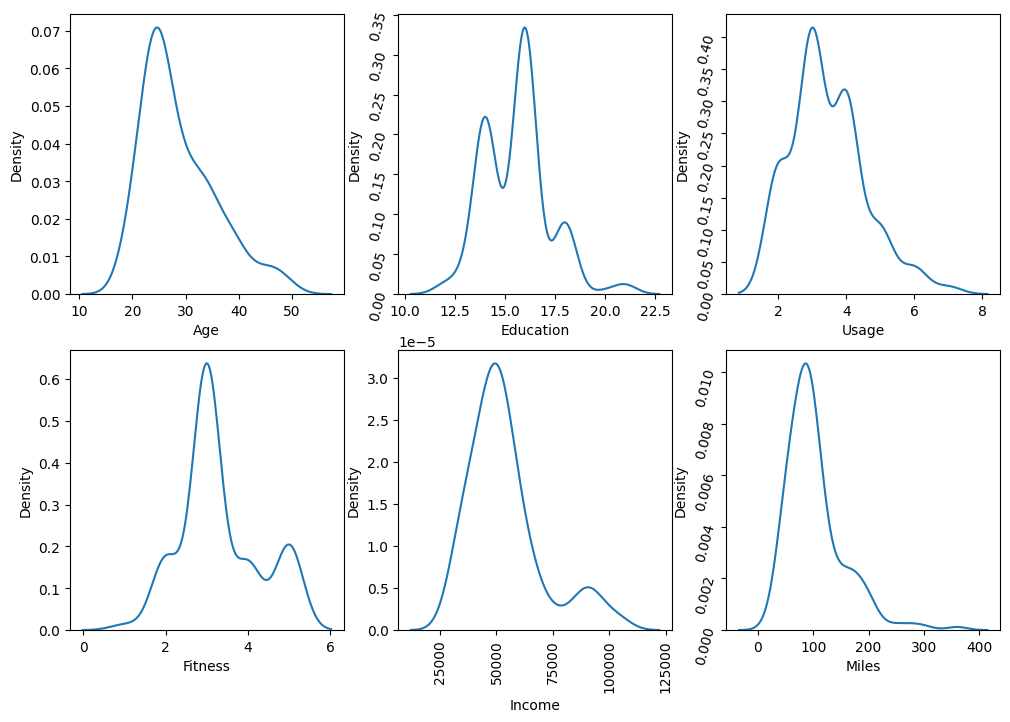

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.kdeplot(df['Age'])
plt.subplot(2,3,2)
sns.kdeplot(df['Education'])
plt.yticks(rotation=75)
plt.subplot(2,3,3)
sns.kdeplot(df['Usage'])
plt.yticks(rotation=75)
plt.subplot(2,3,4)
sns.kdeplot(df['Fitness'])
plt.subplot(2,3,5)
sns.kdeplot(df['Income'])
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.kdeplot(df['Miles'])
plt.yticks(rotation=75)
plt.show()

#### **Exploratory Analysis:**

1.  Age:
*   Mean ≈ 29 years, median = 26 years, range = 18–50 years.
*   Majority of customers are young adults (24–33, Q1–Q3 range).
*   Very few customers above 45 => seniors are underrepresented.

---

2.  Education (years of formal education):
*   Mean ≈ 15.6 years, median = 16 years, range = 12–21 years.
*   Most have undergraduate to graduate-level education (14–16 years, IQR).
*   A small premium segment has 18–21 years (postgraduate/doctorate level).

---

3.  Usage (days per week):
*   Mean ≈ 3.5 days/week, median = 3, range = 2–7.
*   Most use treadmills moderately (3–4 days/week, IQR).
*   A smaller segment uses them daily (6–7 days/week).

---

4.  Fitness Score (scale 1–5):
*   Mean ≈ 3.3, median = 3, range = 1–5.
*   Majority of customers are average-to-fit (3–4); few are unfit (1) or peak-fit (5).

---

5.  Income:
*   Mean ≈ 53.7k, median ≈ 50.6k, range = 29.5k–104.5k.
*   IQR = $44.1k–58.6k => most customers are middle-income.
*   Significant share of high-income customers (>75k) exist, aligning with KP781 buyers.

---

6.  Miles per Week:
*   Mean ≈ 103 miles, median = 94 miles, range = 21–360 miles.
*   Most customers log 66–115 miles/week (IQR) => moderate, regular users.
*   Outliers (200–360 miles) = serious fitness enthusiasts.

## **BUSINESS OBJECTIVES & ANALYSIS MAPPING**

### **What are the overall customer characteristics?**

#### **Contingency Tables:**

In [ ]:
# DEMOGRAPHICS
pd.crosstab(index=df['Gender'],columns=df['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Gender,,,
Female,46,30,76
Male,61,43,104
All,107,73,180


In [ ]:
males = 104
females = 76
partnered = 107
singles = 73
total = 180
print('Male% :',round(males/total*100,2))
print('Female% :',round(females/total*100,2))
print('Partnered% :',round(partnered/total*100,2))
print('Singles% :',round(singles/total*100,2))

Male% : 57.78
Female% : 42.22
Partnered% : 59.44
Singles% : 40.56


In [ ]:
pd.crosstab(index=pd.cut(df['Age'],bins=[15,20,25,30,35,40,45,50,55]),columns=df['Gender'],margins=True)

Gender,Female,Male,All
Age,,,
"(15, 20]",3,7,10
"(20, 25]",29,40,69
"(25, 30]",19,22,41
"(30, 35]",16,16,32
"(35, 40]",6,10,16
"(40, 45]",1,5,6
"(45, 50]",2,4,6
All,76,104,180


#### **Analysis:**

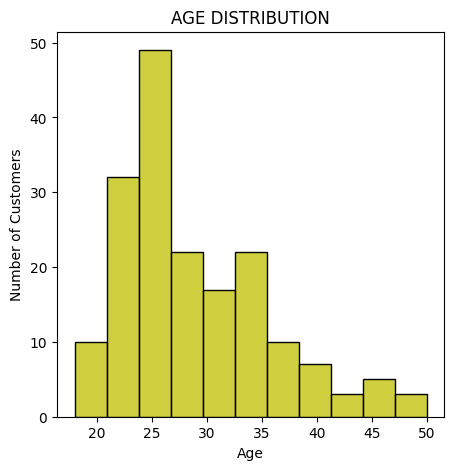

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['Age'],color='y')
plt.title('AGE DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Age')
plt.show()

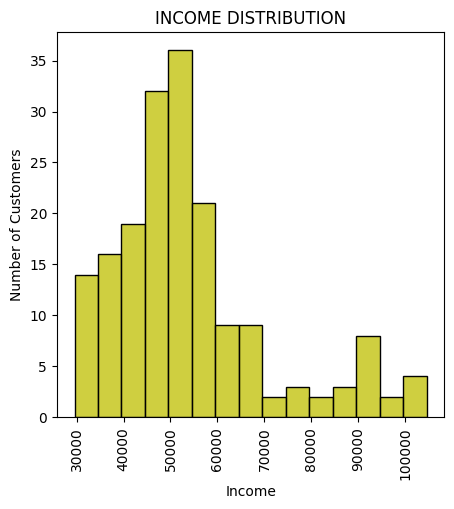

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['Income'],color='y')
plt.title('INCOME DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.show()

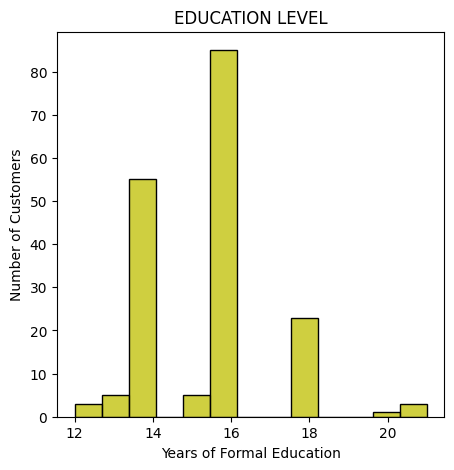

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['Education'],color='y')
plt.title('EDUCATION LEVEL')
plt.ylabel('Number of Customers')
plt.xlabel('Years of Formal Education')
plt.show()

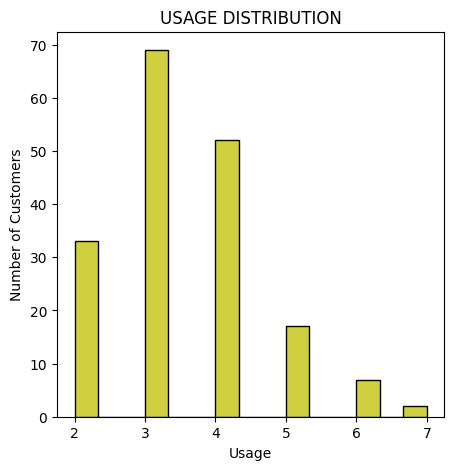

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['Usage'],color='y')
plt.title('USAGE DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Usage')
plt.show()

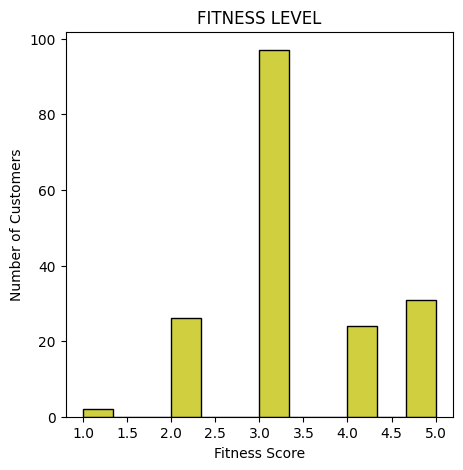

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['Fitness'],color='y')
plt.title('FITNESS LEVEL')
plt.ylabel('Number of Customers')
plt.xlabel('Fitness Score')
plt.show()

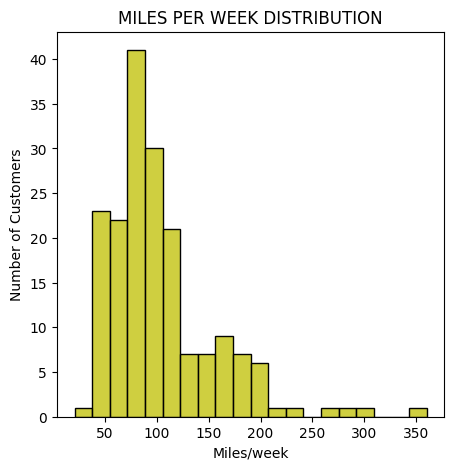

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['Miles'],color='y')
plt.title('MILES PER WEEK DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Miles/week')
plt.show()

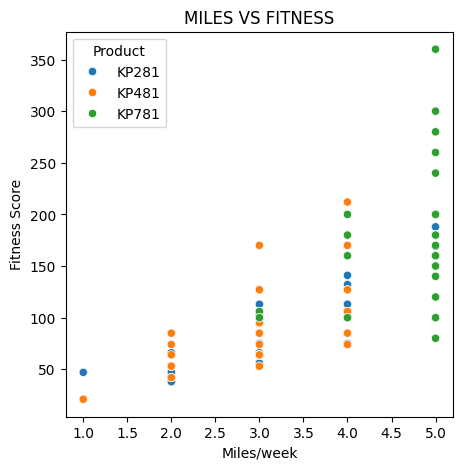

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='Fitness',y='Miles',hue='Product')
plt.title('MILES VS FITNESS')
plt.ylabel('Fitness Score')
plt.xlabel('Miles/week')
plt.show()

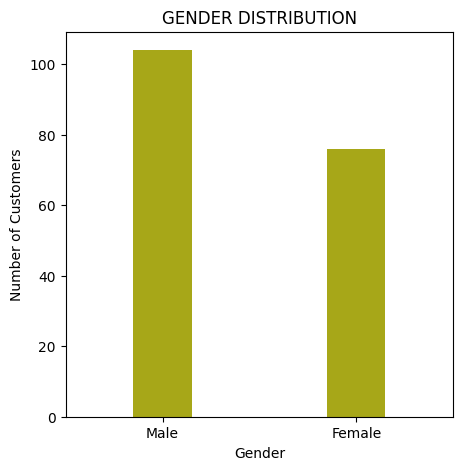

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Gender',width=0.3,color='y')
plt.title('GENDER DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.show()

#### **Findings:**

1.  The **majority** of Aerofit’s customers fall into the **young adult to early middle-age bracket, indicating** a strong target base of **fitness-conscious younger professionals**. The histogram tapers off beyond age 50, suggesting **limited penetration in the senior demographic**.
2.  Aerofit products **primarily appeal to financially stable households**, while the premium pricing and positioning act as a **barrier for lower-income groups**.
3.  The **majority** of Aerofit customers have 14–16 years of formal education, suggesting that the brand appeals strongly to **undergraduate and graduate-level individuals**. Customers with lower education levels are fewer, while a noticeable share of highly educated (18–20+ years) buyers indicates an additional premium segment inclined toward advanced fitness products.
4.  **Most** Aerofit customers run or walk a **moderate number of miles per week**, reflecting regular but not intense treadmill usage. A smaller segment logs 200+ miles weekly, representing serious fitness enthusiasts, while only a handfull fall at the extreme low end (less than 50 miles).
5.  There is a generally **positive relationship between Miles/week and Fitness Score**, with most users clustered in a moderate mileage and fitness range.
6.  The **Gender Distribution** plot shows that men are more represented than women, indicating the product is **more popular among the male demographic**.

---

### **How do customer profiles differ across the three products (KP281, KP481, KP781)?**

#### **Contingency Tables:**

In [ ]:
pd.crosstab(index=pd.cut(df['Age'],bins=[15,20,25,30,35,40,45,50,55]),columns=df['Gender'],margins=True)

Gender,Female,Male,All
Age,,,
"(15, 20]",3,7,10
"(20, 25]",29,40,69
"(25, 30]",19,22,41
"(30, 35]",16,16,32
"(35, 40]",6,10,16
"(40, 45]",1,5,6
"(45, 50]",2,4,6
All,76,104,180


In [ ]:
df['Income'].min(),df['Income'].max()

(29562, 104581)

In [ ]:
pd.crosstab(index=pd.cut(df['Income'],bins=[25000,50000,75000,100000,125000]),columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Income,,,,
"(25000, 50000]",48,30,5,83
"(50000, 75000]",32,30,14,76
"(75000, 100000]",0,0,18,18
"(100000, 125000]",0,0,3,3
All,80,60,40,180


In [ ]:
df['EduGroup'] = pd.cut(df['Education'], bins=[12,15,17,21], labels=['12–15','16–17','18–21'])
pd.crosstab(index=df['Product'], columns=df['EduGroup'], margins=True)

EduGroup,12–15,16–17,18–21,All
Product,,,,
KP281,37,39,2,78
KP481,26,31,2,59
KP781,2,15,23,40
All,65,85,27,177


In [ ]:
pd.crosstab(index=df['Product'], columns=df['Usage'], margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


#### **Analysis:**

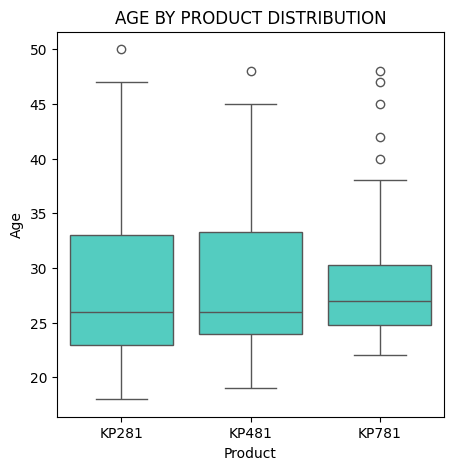

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Age',color='turquoise')
plt.title('AGE BY PRODUCT DISTRIBUTION')
plt.ylabel('Age')
plt.xlabel('Product')
plt.show()

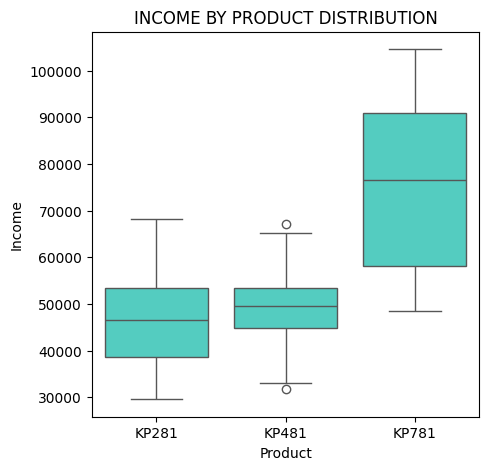

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Income',color='turquoise')
plt.title('INCOME BY PRODUCT DISTRIBUTION')
plt.ylabel('Income')
plt.xlabel('Product')
plt.show()

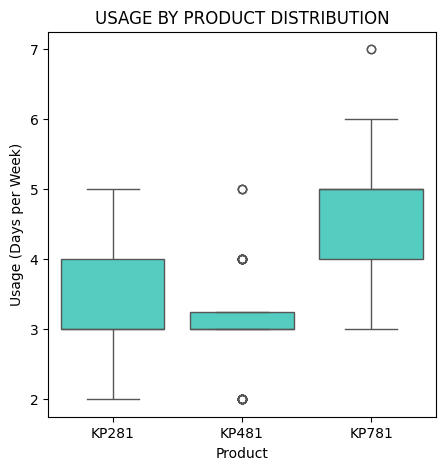

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Usage',color='turquoise')
plt.title('USAGE BY PRODUCT DISTRIBUTION')
plt.ylabel('Usage (Days per Week)')
plt.xlabel('Product')
plt.show()

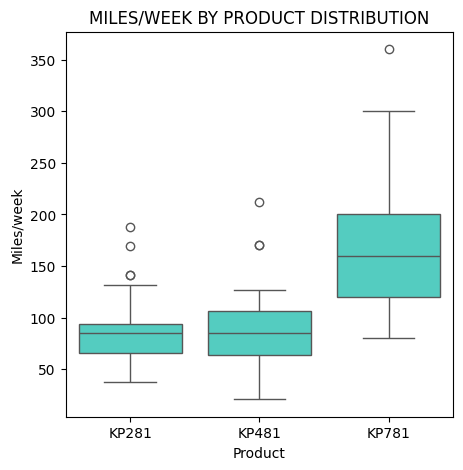

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Miles',color='turquoise')
plt.title('MILES/WEEK BY PRODUCT DISTRIBUTION')
plt.ylabel('Miles/week')
plt.xlabel('Product')
plt.show()

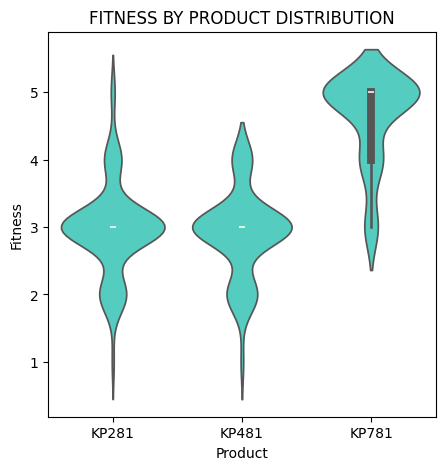

In [ ]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df, x='Product', y='Fitness',color='turquoise')
plt.title('FITNESS BY PRODUCT DISTRIBUTION')
plt.ylabel('Fitness')
plt.xlabel('Product')
plt.show()

#### **Findings:**

1.  **All three products (KP281, KP481, KP781)** have a median age in the mid-20s, indicating a **young core user base**; KP281 and KP481 show a wider age range (≈18–47/45) while KP781 is more age-specific (≈22–38), and **all products have some older-age outliers**, with KP781 showing the most pronounced instances.
2.  **KP781 attracts higher-income users** (≈48k–105k), while **KP281 and KP481 cater to mid-income users** (≈30k–68k) and occasional outliers.
3.  **KP781** users show the **highest and most variable engagement** (3–7 days/week), **KP481** users are **consistently active** around 3 days/week, and **KP281** users fall in between with moderate, **fairly consistent** usage (2–5 days/week).

---

### **What is the demographic distribution of Aerofit customers?**

#### **Contingency Tables:**

In [ ]:
df['EduGroup'] = pd.cut(df['Education'],bins=[12, 15, 17, 21],labels=['12–15 yrs', '16–17 yrs', '18–21 yrs'])

df['IncomeGroup'] = pd.cut(df['Income'],bins=[30000, 50000, 75000, 105000],labels=['30k–50k', '50k–75k', '75k–105k'])

pd.crosstab(index=df['EduGroup'],columns=df['IncomeGroup'],margins=True)

IncomeGroup,30k–50k,50k–75k,75k–105k,All
EduGroup,,,,
12–15 yrs,49,14,1,64
16–17 yrs,28,51,6,85
18–21 yrs,2,11,14,27
All,79,76,21,176


#### **Analysis:**

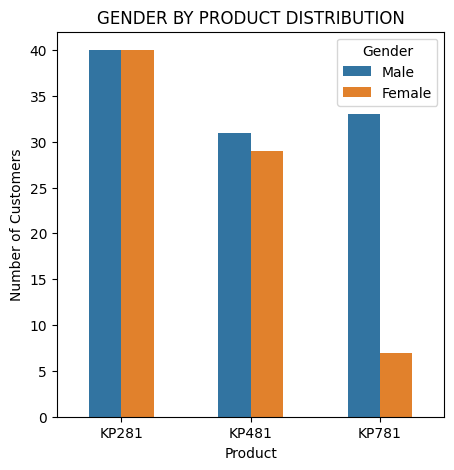

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Product',hue='Gender',width=0.5)
plt.title('GENDER BY PRODUCT DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.show()

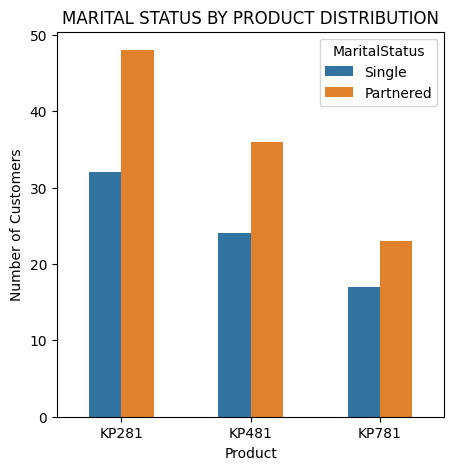

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Product',hue='MaritalStatus',width=0.5)
plt.title('MARITAL STATUS BY PRODUCT DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.show()

#### **Findings:**

1.  While **KP281 appeals equally to both genders, KP481 shows a slight male preference, and KP781 is predominantly used by male customers**.
2.  **Across all three treadmill models, partnered customers consistently outnumber singles**. This indicates that Aerofit treadmills are more often purchased by households and couples, possibly reflecting a shared investment in fitness equipment, while single buyers form a smaller but notable secondary market.



---

### **How do education level, income, treadmill purchase, and usage interrelate?**

#### **Contingency Tables:**

In [ ]:
pd.crosstab(index=df['Education'], columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


In [ ]:
pd.crosstab(index=df['Usage'], columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180


In [ ]:
pd.crosstab(index=df['Product'], columns=[df['EduGroup'], df['IncomeGroup']],margins=True)

EduGroup    12–15 yrs                  16–17 yrs                  18–21 yrs  \
IncomeGroup   30k–50k 50k–75k 75k–105k   30k–50k 50k–75k 75k–105k   30k–50k   
Product                                                                       
KP281              27       9        0        18      21        0         0   
KP481              21       5        0         7      24        0         1   
KP781               1       0        1         3       6        6         1   
All                49      14        1        28      51        6         2   

EduGroup                      All  
IncomeGroup 50k–75k 75k–105k       
Product                            
KP281             2        0   77  
KP481             1        0   59  
KP781             8       14   40  
All              11       14  176

#### **Analysis:**

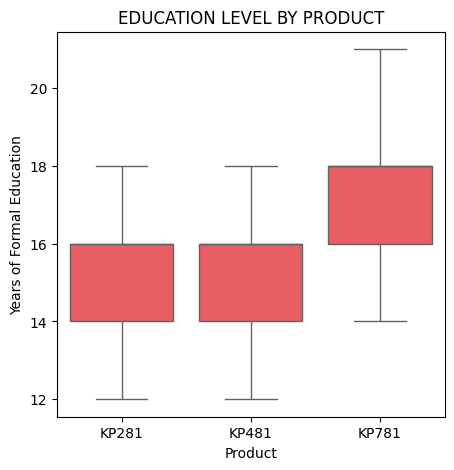

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Education',color='xkcd:light red')
plt.title('EDUCATION LEVEL BY PRODUCT')
plt.ylabel('Years of Formal Education')
plt.xlabel('Product')
plt.show()

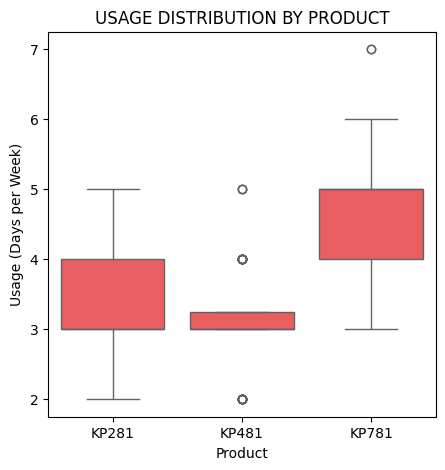

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Usage',color='xkcd:light red')
plt.title('USAGE DISTRIBUTION BY PRODUCT')
plt.ylabel('Usage (Days per Week)')
plt.xlabel('Product')
plt.show()

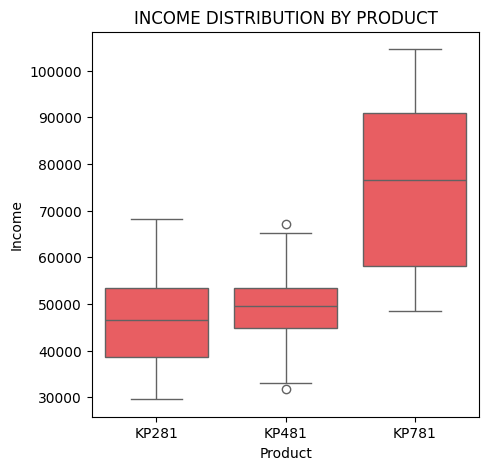

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Product', y='Income',color='xkcd:light red')
plt.title('INCOME DISTRIBUTION BY PRODUCT')
plt.ylabel('Income')
plt.xlabel('Product')
plt.show()

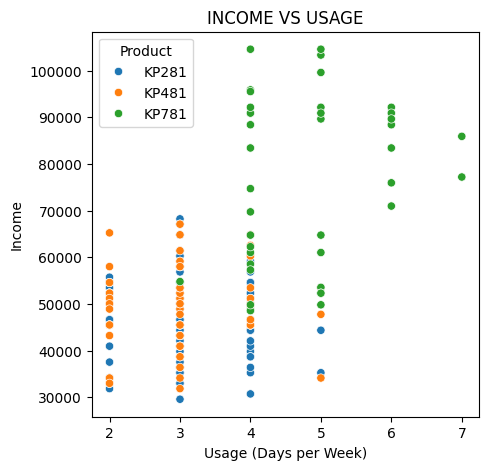

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='Usage',y='Income',hue='Product')
plt.title('INCOME VS USAGE')
plt.ylabel('Income')
plt.xlabel('Usage (Days per Week)')
plt.show()

#### **Findings:**

1.  Customers purchasing the KP281 and KP481 models generally have 14–16 years of formal education. In contrast, the premium KP781 attracts a more highly educated customer base (16–20+ years). This indicates that education level is positively associated with premium product choice: buyers with higher education tend to prefer Aerofit’s top-end models, while those with mid-level education lean toward entry and mid-tier products.
2.  KP281 shows moderate usage (about 3 days/week) appealing to casual users; KP481 has a tight clustering around 3 days/week, reflecting steady moderate routines; KP781 records higher usage (about 4–5 days/week), confirming its appeal to serious fitness enthusiasts and positioning it as the premium choice for committed users.
3.  Aerofit’s entry-level models (KP281, KP481) attract middle-income users, while the premium KP781 is favored by higher-income households ($75K+)
4.  Middle-income customers using treadmills moderately (2–4 days/week) prefer KP281/481, while higher-income customers with heavier usage (4–7 days/week) favor KP781, highlighting income-linked product segmentation.

---

### **Which behavioral factors drive actual treadmill usage (miles run weekly)?**

#### **Analysis:**

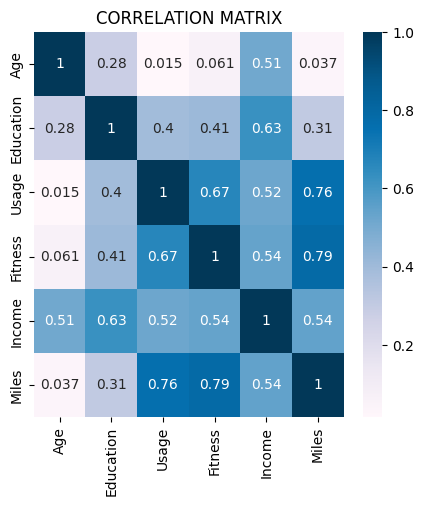

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='PuBu')
plt.title('CORRELATION MATRIX')
plt.show()

#### **Findings:**

Note: "r": Pearson correlation coefficient

---

**Strong Correlations**

1.  Miles and Fitness (r=0.79): This is the strongest correlation shown. As a person's fitness level increases, the number of miles they run or walk on a treadmill tends to increase significantly. This makes intuitive sense, as fitter individuals are likely to use a treadmill more frequently and for longer distances.
2.  Miles and Usage (r=0.76): There is a very strong positive relationship between the number of miles covered and how many times a week a person uses the treadmill (Usage). This suggests that people who use the treadmill more often also cover greater distances.
3.  Income and Education (r=0.63): This indicates that there's a strong positive correlation between a person's Income and their level of Education. This is a well-established trend in many demographic studies.

---

**Moderate Correlations**

1.  Income and Age (r=0.51): As Age increases, there's a moderate tendency for Income to also increase. This often reflects career progression over time.
2.  Income and Usage (r=0.52): Individuals with higher Income tend to use the treadmill more frequently (Usage). This could be related to having more disposable income to invest in a health-focused lifestyle or a home gym.
3.  Education and Usage (r=0.40): People with higher Education levels tend to use the treadmill more often (Usage).

---

**Weaker Correlations**

1.  Age and Usage (r=0.015): The correlation between a person's Age and how often they use the treadmill (Usage) is extremely weak. This suggests that age is not a significant predictor of how frequently someone uses the equipment.
2.  Age and Miles (r=0.037): The relationship between Age and the number of Miles covered is very weak, indicating that older or younger individuals aren't significantly more or less likely to cover greater distances.
3.  Age and Fitness (r=0.061): There is almost no correlation between Age and a person's Fitness level. This suggests that fitness is independent of age within this dataset.

---

### **Which product segments generate the most value for Aerofit?**

#### **Contingency Tables:**

In [ ]:
pd.crosstab(index=df['Product'],columns=df['IncomeGroup'],margins=True,normalize=True)*100

IncomeGroup,30k–50k,50k–75k,75k–105k,All
Product,,,,
KP281,26.256983,17.877095,0.000000,44.134078
KP481,16.759777,16.759777,0.000000,33.519553
KP781,2.793296,7.821229,11.731844,22.346369
All,45.810056,42.458101,11.731844,100.000000


#### **Analysis:**

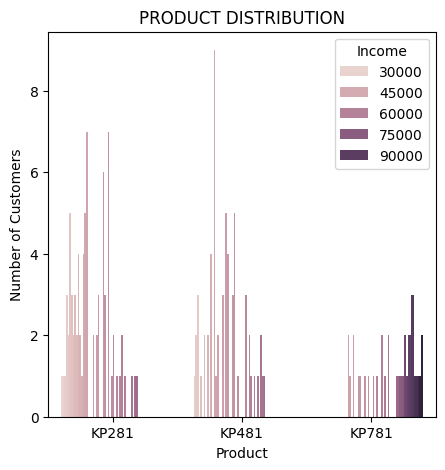

In [ ]:
# Countplot (Number of Customers per Product)
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Product',hue='Income')
plt.title('PRODUCT DISTRIBUTION')
plt.ylabel('Number of Customers')
plt.xlabel('Product')
plt.show()

#### **Findings:**

There's a clear segmentation of products across different income levels:

1.  The KP281 model is popular across most income brackets but seems to have a higher concentration of customers in the \$30,000 to \$60,000 range.
2.  The KP481 model also appeals to a wide range of customers but has a notable number of customers with incomes around \$45,000 to \$60,000.
3.  The KP781 model is primarily purchased by customers in the \$75,000 and \$90,000 income brackets, indicating that this is a premium product targeted at higher-income individuals.

---

## **BUSINESS TAKEAWAY & ACTIONABLE INSIGHTS**

1.  **Expand Senior Outreach**: Since adoption sharply tapers off beyond the age of 50, Aerofit could design **ergonomic treadmills** for seniors and run campaigns targeting the older demographic.

2.  **Reinforce Premium Strategy**: Since KP781 is strongly associated with high-income, highly educated, frequent users, Aerofit should continue premium positioning, but **add exclusive value propositions** (e.g., advanced tracking, service bundles) to strengthen loyalty.

3.  **Sustainable Upgrade Program**: Strategies like **trade-in options** encourage upgrades from entry-level to premium models, build **customer loyalty**, boost sales by easing **affordability**, and support **sustainability** through refurbishing or recycling old treadmills.

4.  **Couple/Household Targeting**: Since partnered customers dominate purchases, Aerofit could market treadmills as a shared household investment (e.g., “Fitness for Two” campaigns).

5.  **Close Gender Gap**: With men outnumbering women, **female-centric marketing and product design** (lighter builds, wellness-focused features) could unlock new growth.

6.  **Education-Based Messaging**: With most buyers having 14–16 years of education, Aerofit can use data-driven marketing content appealing to educated professionals, while also creating **aspirational campaigns** to attract less-educated segments.

7.  **Mileage & Fitness Correlation**: Since miles/week and fitness score are strongly correlated, Aerofit **could gamify treadmill** use (leaderboards, fitness challenges) to keep users engaged and increase usage.

8.  **Income-Linked Segmentation**: With clear separation between mid-income users (KP281/481) and high-income users (KP781), Aerofit should maintain tiered product strategies while **upselling premium users into long-term service contracts**, i.e. persuading them to not just buy the expensive product, but also sign up for ongoing services that keep them engaged and generate recurring revenue.

9.  **Retention & Engagement Programs**: Moderate usage (2–4 days/week) is the norm and thus, Aerofit could introduce incentives like reward systems to **push casual users toward higher engagement**.

---

---

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.








.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.